In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import pandas_profiling as pp
import warnings
warnings.simplefilter("ignore")

In [0]:
data = pd.read_csv('datasets_494724_1208143_COVID19_line_list_data.csv')
data.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# проверим есть ли пропущенные значения
data.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

In [0]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.drop(columns=['Unnamed: 21','link','source', 'summary','reporting date','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','symptom','Unnamed: 26', 'Unnamed: 3','symptom_onset','If_onset_approximated','hosp_visit_date','exposure_start', 'exposure_end'])
(data.shape, data_new_1.shape)

((1085, 27), (1085, 10))

In [0]:
data_new_1.head()

,id,case_in_country,location,country,gender,age,visiting Wuhan,from Wuhan,death,recovered
0,1,NaN,"Shenzhen, Guangdong",China,male,66.0,1,0.0,0,0
1,2,NaN,Shanghai,China,female,56.0,0,1.0,0,0
2,3,NaN,Zhejiang,China,male,46.0,0,1.0,0,0
3,4,NaN,Tianjin,China,female,60.0,1,0.0,0,0
4,5,NaN,Tianjin,China,male,58.0,0,0.0,0,0


In [0]:
data_new_1.isnull().sum()

id                   0
case_in_country    197
location             0
country              0
gender             183
age                242
visiting Wuhan       0
from Wuhan           4
death                0
recovered            0
dtype: int64

In [0]:
# Удаление строки, содержащих пустые значения
data_new_2 = data_new_1.dropna(axis=0,how='any',subset=['case_in_country','gender', 'age'])
(data_new_1.shape, data_new_2.shape)

((1085, 10), (635, 10))

In [0]:
data_new_2.head()

,id,case_in_country,location,country,gender,age,visiting Wuhan,from Wuhan,death,recovered
197,198,1.0,Bordeaux,France,male,48.0,1,0.0,0,0
198,199,2.0,Paris,France,male,31.0,0,1.0,0,02/12/20
199,200,3.0,Paris,France,female,30.0,0,1.0,0,02/12/20
200,201,4.0,Paris,France,male,80.0,0,1.0,2/14/2020,0
209,210,13.0,Paris,France,female,33.0,0,0.0,0,0


In [0]:
data_new_2.shape[0]

635

In [0]:
data_new_2['death'] = data_new_2['death'].apply(lambda x: 0 if x=='0' else 1)

In [0]:
data_new_2['recovered'] = data_new_2['recovered'].apply(lambda x: 0 if x=='0' else 1)

In [0]:
data_new_2

,id,case_in_country,location,country,gender,age,visiting Wuhan,from Wuhan,death,recovered
197,198,1.0,Bordeaux,France,male,48.0,1,0.0,0,0
198,199,2.0,Paris,France,male,31.0,0,1.0,0,1
199,200,3.0,Paris,France,female,30.0,0,1.0,0,1
200,201,4.0,Paris,France,male,80.0,0,1.0,1,0
209,210,13.0,Paris,France,female,33.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
1027,1028,32.0,Andalusia,Spain,male,58.0,0,0.0,0,0
1029,1030,34.0,Zaragoza,Spain,female,27.0,0,0.0,0,0
1030,1031,1.0,Jonkoping,Sweden,female,25.0,1,0.0,0,0
1052,1053,1.0,Lebanon,Lebanon,female,45.0,0,0.0,0,0


In [0]:
data = pd.get_dummies(data_new_2)
data = pd.get_dummies(data_new_2)
data = data.drop(columns=['id','case_in_country'])
(data.shape, data.shape)

((635, 118), (635, 118))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = data.death
data.drop('death', axis=1, inplace=True)
X_cov, X_test, y_cov, y_test = train_test_split(data, y, test_size=0.2)
print (X_cov.shape, y_cov.shape)
print (X_test.shape, y_test.shape)

(508, 117) (508,)
(127, 117) (127,)


Обучение модели

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=10)

In [0]:
KNeighborsClassifierObj.fit(X_cov, y_cov)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
y_predicted = KNeighborsClassifierObj.predict(X_test)

Метрика качества

In [0]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, classification_report

In [0]:
accuracy_score(y_test, y_predicted)

0.9763779527559056

In [0]:
precision_score(y_test, y_predicted)

0.0

*Смертность не зависит от других параметров.*

In [0]:
classification_report(y_test, y_predicted, output_dict = True)

{'0': {'f1-score': 0.9880478087649402,
  'precision': 0.9763779527559056,
  'recall': 1.0,
  'support': 124},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 3},
 'accuracy': 0.9763779527559056,
 'macro avg': {'f1-score': 0.4940239043824701,
  'precision': 0.4881889763779528,
  'recall': 0.5,
  'support': 127},
 'weighted avg': {'f1-score': 0.9647080967468709,
  'precision': 0.9533139066278133,
  'recall': 0.9763779527559056,
  'support': 127}}

Кросс-валидация

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(KNeighborsClassifierObj, 
                         X_cov, y_cov, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.94737584, 0.95584342, 0.95584342]), 0.9530208904419757)

Подбор гиперпараметров


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]

In [0]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='f1_weighted')

In [0]:
clf_gs.fit(X_cov, y_cov)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [0]:
clf_gs.best_params_

{'n_neighbors': 5}

In [0]:
clf_gs.best_score_

0.9549397178298793

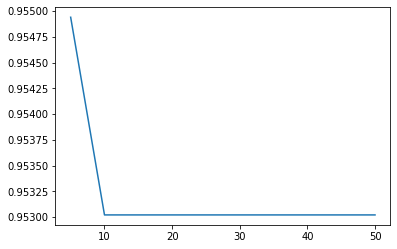

In [0]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])